In [1]:
from sklearn import tree
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', None)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG 
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
import math as m
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import glob,os

/opt/homebrew/Caskroom/miniconda/base/envs/gisflakes/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [144]:
ls

2023-04-01 00.26.18.jpg
2023-04-01 00.26.55.jpg
Connected_products.ipynb
Marking Hack.docx
Marking_hack.ipynb
Marking_hack_data-Copy1.ipynb
Marking_hack_data.ipynb
Walmart.csv
Weather.ipynb
archive/
beer_forecasting/
beer_forecasting.zip
competitive-data-science-predict-future-sales/
demand-forecasting-kernels-only/
in_temp.csv
prod_temp.csv
shampoo_sales.csv
webmark/
webmark.zip
~$rking Hack.docx


In [145]:
#это файл с погодой для Москвы, сцепленный с продажами по регионам Москвы
#в интерфейсе должна быть кнопка с выпадабщим окном "выберите регион", выпадает Москва, загружается этот файл и проходит анализ
weather = pd.read_csv("prod_temp.csv")

In [147]:
weather = weather.drop(columns = "Unnamed: 0")

In [148]:
weather['dt'] =  pd.to_datetime(weather['dt'])

In [149]:
weather = weather.set_index('dt')

In [181]:
grouped = weather.groupby(['temp','gtin']).sum()
print(grouped.head())

                                         price  cnt
temp  gtin                                         
-20.0 0002998B71212A1D2546365B3C8119E9   98566    1
      00072BAF1D237407FE1FC89A187A2123  270000    5
      00131FCBD06A7E8B5DDAF8B64F6BD5FD   28571    1
      00229951E93839E8AD7BD37C38DB37FF  523656    6
      002F470CCBC55CF19F1EED35A38548D5  178328    2


In [182]:
grouped_cnt = grouped.drop(columns = "price")
grouped_price = grouped.drop(columns = "cnt")

In [156]:
def front(self, n):
    return self.iloc[:, :n]

def back(self, n):
    return self.iloc[:, -n:]

pd.DataFrame.front = front
pd.DataFrame.back = back

In [ ]:
#Выводится граифик для 50 gtin - распределение по температуре 
#Первый график - объем продаж
#Второй график - цена

<AxesSubplot:xlabel='temp'>

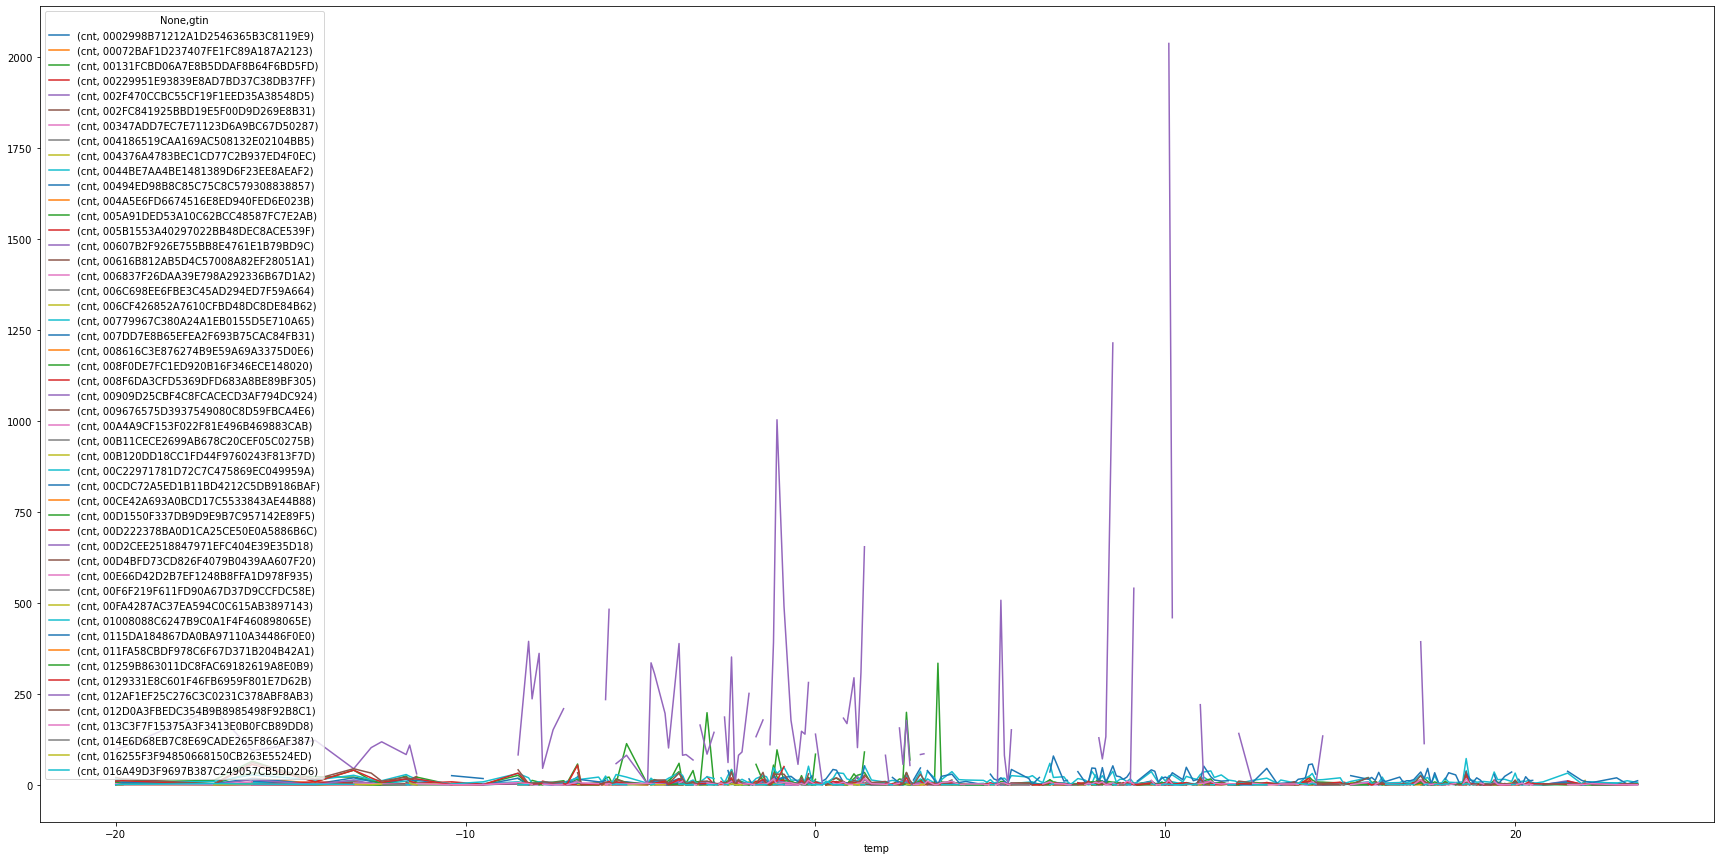

In [183]:
#plot data
fig, ax = plt.subplots(figsize=(30,15))
grouped_cnt.unstack().front(50).plot(ax=ax)

<AxesSubplot:xlabel='temp'>

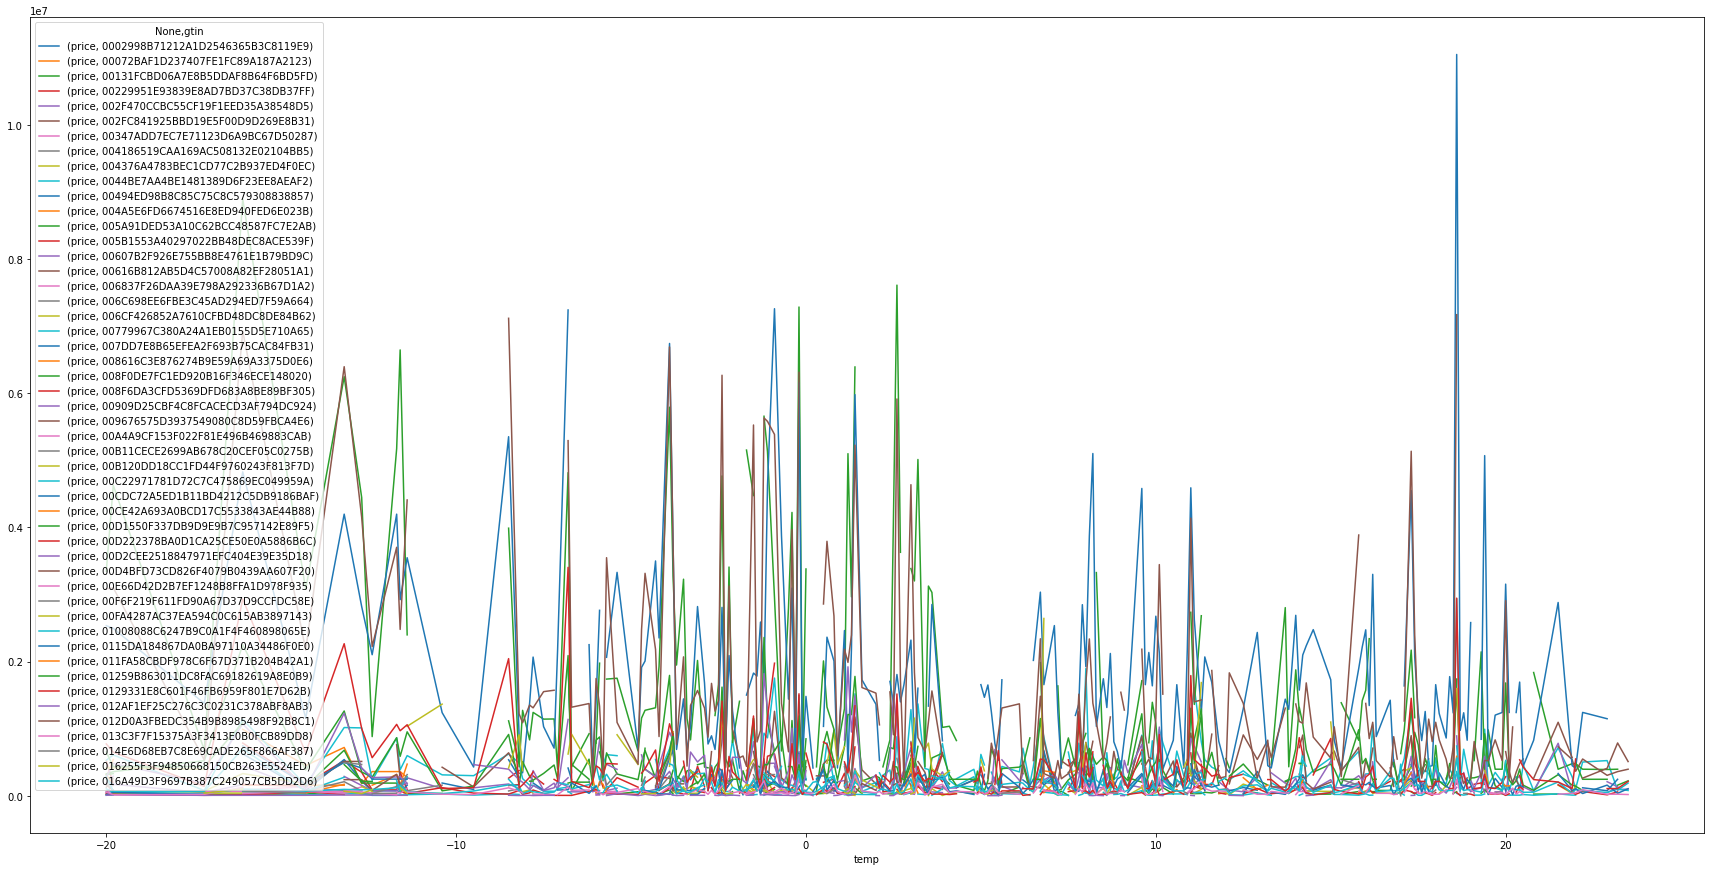

In [184]:
#plot data
fig, ax = plt.subplots(figsize=(30,15))
grouped_price.unstack().front(50).plot(ax=ax)

In [186]:
corrs = weather.groupby('gtin')[['temp','cnt']].corr().iloc[0::2,-1]

In [187]:
corrs = pd.DataFrame(corrs)

In [189]:
corrs.dropna()

,,cnt
gtin,,
0001F26B23B2A54E6B8F1465C0D0CF07,temp,-0.193800
00047C13176D835CB77048C665E288E3,temp,-0.122974
00072BAF1D237407FE1FC89A187A2123,temp,-0.015892
000A2748915A6818CC6AA993958DEB8F,temp,-0.142888
001086B365D7D32436DA85BC41729543,temp,-0.054595
...,...,...
FFF3987DFF9E4D5920C74D42B60A71A9,temp,0.486527
FFF4D7F0C94B982A078E4AAD391CFB5F,temp,0.242467
FFF8CA99860BCD1370FA25B49044E225,temp,-0.022290


In [197]:
real_cors = corrs.loc[corrs['cnt'] >= 0.99]

In [ ]:
#Выводится текст "количество положительных корреляций объема продаж с температурой,  len(real_cors.index)"

In [201]:
print ("Количество положительных корреляций объема продаж с температурой:",len(real_cors.index))

Количество положительных корреляций объема продаж с температурой: 259


In [ ]:
#Выводится текст "количество отрицательных корреляций объема продаж с температурой,  len(real_cors.index)"

In [199]:
real_cors_neg = corrs.loc[corrs['cnt'] <= -0.99]

In [203]:
print ("Количество отрицательных корреляций объема продаж с температурой:",len(real_cors_neg.index))

Количество отрицательных корреляций объема продаж с температурой: 252


In [ ]:
#предлагаем скачать файлы c корреляциями в .csv